# TITANIC DATASET ANALYSIS

#### Import necessary libraries

In [173]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression




#### Load the dataset into a dataframe

In [87]:
data = pd.read_csv('titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Data description

We can use the `describe()` method to get a summary of the numerical attributes of the dataset. This will help us to understand the data better.

In [88]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The `info()` method will give us a concise summary of the dataframe, including the number of non-null values in each column as well as the data type of each column.

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In order to understand what features we may have to clean, as there might be missing values, we can use the code below to get the number of missing values in each column.

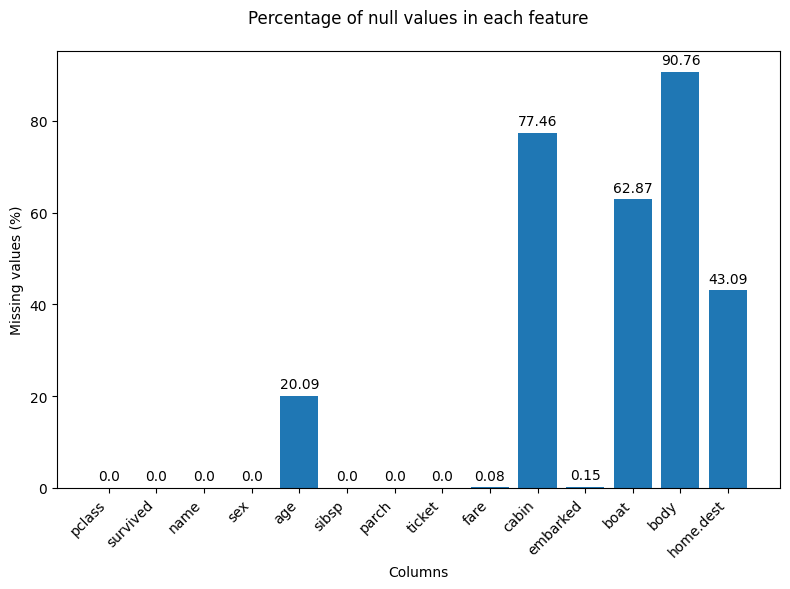

In [90]:
# Calculate the percentage of missing values in each column
missing_data = data.isna().sum() / len(data) * 100

# Create a bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(missing_data.index, missing_data.values)
plt.title('Percentage of null values in each feature', pad=20)
plt.xlabel('Columns')
plt.ylabel('Missing values (%)')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### NaN values
Upon reviewing the dataset, we noted a significant number of NaN values in the `body`, `boat`, and `cabin` columns. Given their high percentage of NaN values, we decided to drop these columns as they wouldn't contribute meaningfully to our analysis. Although the `age`, `home.dest` and `fare` columns also contain a considerable amount of missing data, falling just under 50%, we needed to think how we would handle them. We resolved to drop the `home.dest` column due to its limited relevance to our analysis. For the `age` and `fare` columns, we chose to turn the NaN values into the mean of the column.

##### Data cleaning
After addressing the features with a significat percentage of NaN values, we turned our attention to the other columns. Upon consideration, we determined that the `name` column served no significant purpose for our analysis decideding to drop it. Similarly, we chose to remove the `ticket` column as it merely serves as a unique identifier for each passenger and does not offer valuable insights. Additionally, recognizing the presence of categorical features, we proceeded to convert them into numerical values using the `get_dummies()` method. Specifically, the `sex` and `embarked` columns were converted into multiple binary columns. For the `sex` column, it created two new columns: `sex_male` and `sex_female`, where a `1` represents the presence of that category and a `0` represents the absence. Similarly, for the `embarked` column, it created three new columns: `embarked_C`, `embarked_Q`, and `embarked_S`, each representing one of the original categories.

In [92]:
# Changing the Nan values in the age and fare columns to the mean of the column
data.fillna({'age': data['age'].mean(), 'fare': data['fare'].mean()}, inplace=True)

# Dropping the body, boat, cabin and home.dest columns
processed_data = data.drop(['boat', 'body', 'cabin', 'home.dest'], axis=1) 

# Converting the categorical columns: sex and embarked to numerical columns
processed_data = pd.get_dummies(processed_data, columns=['sex', 'embarked'])

# Droping the name and ticket columns
processed_data = processed_data.drop(['name', 'ticket'], axis=1)

processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1309 non-null   float64
 6   sex_female  1309 non-null   bool   
 7   sex_male    1309 non-null   bool   
 8   embarked_C  1309 non-null   bool   
 9   embarked_Q  1309 non-null   bool   
 10  embarked_S  1309 non-null   bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 67.9 KB


#### Data analysis

##### Train-test split

Before proceeding with the analysis, we split the data into training and testing sets. We used the `train_test_split()` method from the `sklearn.model_selection` module to split the data into 80% training and 20% testing sets. This allowed us to train our model on the training set and evaluate its performance on the testing set.

In [197]:
# Splitting the data into features and target
X = processed_data.drop('survived', axis=1)
y = processed_data['survived']
n_iterations = 5000
accuracies = []

# Initialize lists to store each element of the confusion matrix
tps = []  # True positives
tns = []  # True negatives
fps = []  # False positives
fns = []  # False negatives


##### Logistic regression

Logistic regression is a supervised machine learning algorithm used for binary classification problems. It predicts the probability of an instance belonging to a particular class. In our case, we used logistic regression to predict whether a passenger survived the Titanic disaster or not. We trained a logistic regression model on the training data and evaluated its performance on the testing data.

Average accuracy: 78.70251908396946


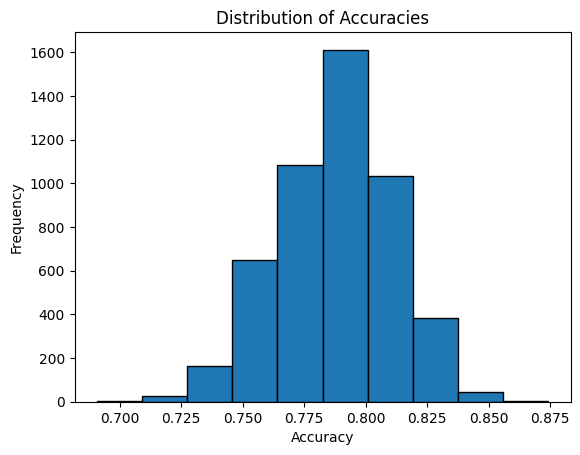

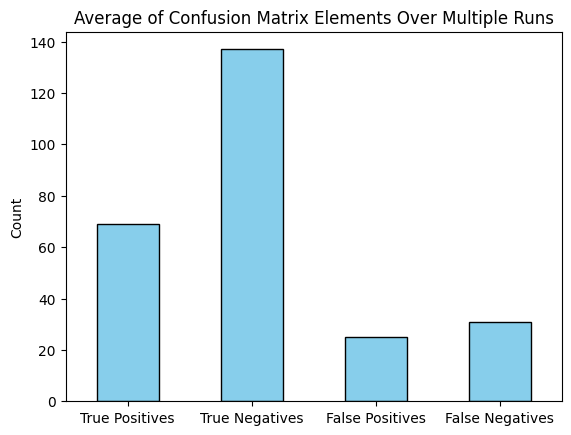

In [198]:
for _ in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a logistic regression model
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    cm = confusion_matrix(y_test, y_pred)

    # Add each element to the appropriate list
    tps.append(cm[1, 1])
    tns.append(cm[0, 0])
    fps.append(cm[0, 1])
    fns.append(cm[1, 0])

avg_accuracy = np.mean(accuracies) * 100
print(f'Average accuracy: {avg_accuracy}')

# Plot the distribution of accuracies
plt.hist(accuracies, bins=10, edgecolor='black')
plt.title('Distribution of Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

# Calculate the average of each element in the confusion matrix
avg_tps = round(np.mean(tps))
avg_tns = round(np.mean(tns))
avg_fps = round(np.mean(fps))
avg_fns = round(np.mean(fns))

# Create a DataFrame from the averages
df = pd.DataFrame([avg_tps, avg_tns, avg_fps, avg_fns], 
                  index=['True Positives', 'True Negatives', 'False Positives', 'False Negatives'], 
                  columns=['Average'])

# Create a bar plot of the averages
df['Average'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average of Confusion Matrix Elements Over Multiple Runs')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

(array([  13.,   45.,  213.,  574., 1125., 1351., 1026.,  487.,  154.,
          12.]),
 array([67.68292683, 69.20731707, 70.73170732, 72.25609756, 73.7804878 ,
        75.30487805, 76.82926829, 78.35365854, 79.87804878, 81.40243902,
        82.92682927]),
 <BarContainer object of 10 artists>)

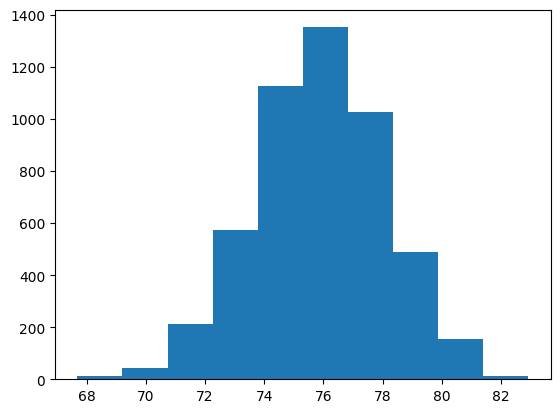

In [148]:
all_inputs = processed_data.drop('survived', axis=1)
all_labels = processed_data['survived']

from sklearn.tree import DecisionTreeClassifier

model_accuracy = []
for _ in range(5000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)


    # Create the classifier
    classifier = DecisionTreeClassifier()

    # Train the classifier on the training set
    classifier.fit(training_inputs, training_classes)

    # Validate the classifier on the testing set using classification accuracy
    model_accuracy.append(classifier.score(testing_inputs, testing_classes) * 100)
    
plt.hist(model_accuracy)

Text(0.5, 1.0, 'Average score: 77.99706400469759')

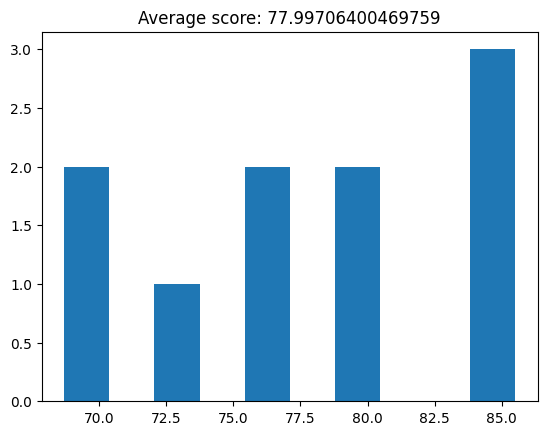

In [ ]:
import numpy as np
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
scores = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10) * 100; 
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Best score: 0.7799706400469758
Best parameters: {'max_depth': 1, 'max_features': 7}


Text(50.722222222222214, 0.5, 'max_depth')

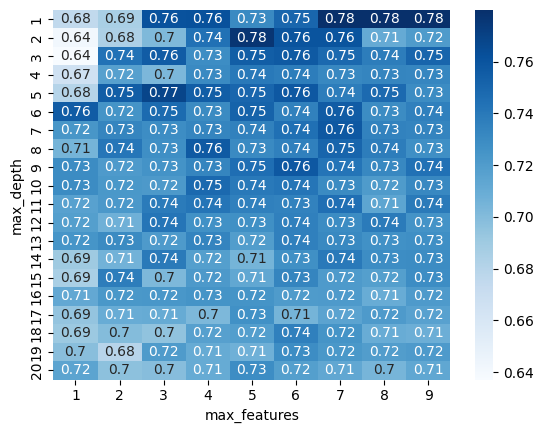

In [ ]:

from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV( decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (20, 9)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(9) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(20) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#! tirar isto q isto é copy paste
def print_accuracy_score(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: ", accuracy)

random_forest_classifier = RandomForestClassifier()

random_forest_classifier.fit(training_inputs, training_classes)

predictions = random_forest_classifier.predict(testing_inputs)

print_accuracy_score(testing_classes, predictions)

Accuracy:  0.774390243902439
